In [1]:
import pickle
import seaborn as sns

In [2]:
with open("measure-barzur.pkl", "rb") as pkl:
    load = pickle.load(pkl)
    their = load["their"]
    our = load["our"]
    data = load["data"]

print("their:", their["model"], their["mdp"], sep="\n")
print()
print("our:", our["model"], our["mdp"], sep="\n")
data = data.assign(rpp_minus_alpha=data.rpp - data.alpha)
data

their:
barzur20aft.Bitcoin(alpha=0.125, gamma=0.25, maximum_fork_length=5)
MDP of size 74 / 4 / 258 / 3.5

our:
sm.SelfishMining(Bitcoin(), alpha=0.125, gamma=0.25, maximum_height=5, maximum_size=0, force_consider_own=True)
MDP of size 2502 / 4 / 11170 / 4.5


,alpha,gamma,horizon,eps,model,vi_discount,vi_delta,vi_stop_delta,vi_iter,vi_max_iter,...,vi_max_value,ss_reachable,ss_nonzero,ss_time,pe_iter,ptrev,rpp,time,vi_steady_value,rpp_minus_alpha
0,0.35,0.25,50,0.01,their,1,0.009985,0.01,300,0,...,22.068002,35,35,0.039909,2,0.181242,0.376718,0.087247,18.211839,2.671792e-02
1,0.35,0.25,50,0.01,our,1,0.009929,0.01,328,0,...,22.091072,129,129,0.002559,2,0.159342,0.381043,1.702007,18.345856,3.104314e-02
2,0.45,1.00,100,0.01,their,1,0.009980,0.01,820,0,...,72.003215,19,19,0.000801,2,0.277481,0.723785,0.124894,70.181914,2.737846e-01
3,0.45,1.00,100,0.01,our,1,0.009964,0.01,899,0,...,73.386548,33,33,0.001159,2,0.270144,0.740265,4.638374,71.587631,2.902655e-01
4,0.05,0.25,100,0.01,their,1,0.009909,0.01,315,0,...,8.854622,17,17,0.000822,2,0.025000,0.050000,0.049765,3.973328,-3.733125e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.30,1.00,100,0.01,our,1,0.009979,0.01,694,0,...,44.025345,54,54,0.001389,2,0.175063,0.424427,3.935819,40.422777,1.244272e-01
266,0.45,0.75,50,0.01,their,1,0.009986,0.01,359,0,...,32.605373,47,47,0.001110,2,0.280625,0.607785,0.060893,30.124697,1.577851e-01
267,0.45,0.75,50,0.01,our,1,0.009993,0.01,442,0,...,35.963076,228,228,0.005806,2,0.252895,0.698294,2.530370,33.987433,2.482943e-01
268,0.15,0.00,100,0.01,their,1,0.009989,0.01,501,0,...,18.477035,17,17,0.000877,2,0.075000,0.150000,0.117465,13.791287,2.942091e-15


In [3]:
data[(data.ss_reachable - data.ss_nonzero) != 0]

,alpha,gamma,horizon,eps,model,vi_discount,vi_delta,vi_stop_delta,vi_iter,vi_max_iter,...,vi_max_value,ss_reachable,ss_nonzero,ss_time,pe_iter,ptrev,rpp,time,vi_steady_value,rpp_minus_alpha
34,0.05,0.75,25,0.01,their,1,0.009612,0.01,81,0,...,5.820096,5,4,0.000580,2,0.025,0.05,0.013732,1.010755,-6.106227e-16
110,0.05,0.50,25,0.01,their,1,0.009612,0.01,81,0,...,5.820096,5,4,0.000579,2,0.025,0.05,0.013730,1.010755,-6.106227e-16
162,0.05,0.25,25,0.01,their,1,0.009612,0.01,81,0,...,5.820096,5,4,0.000623,2,0.025,0.05,0.014745,1.010755,-6.106227e-16
252,0.05,0.00,25,0.01,their,1,0.009612,0.01,81,0,...,5.820096,5,4,0.000618,2,0.025,0.05,0.014989,1.010755,-6.106227e-16


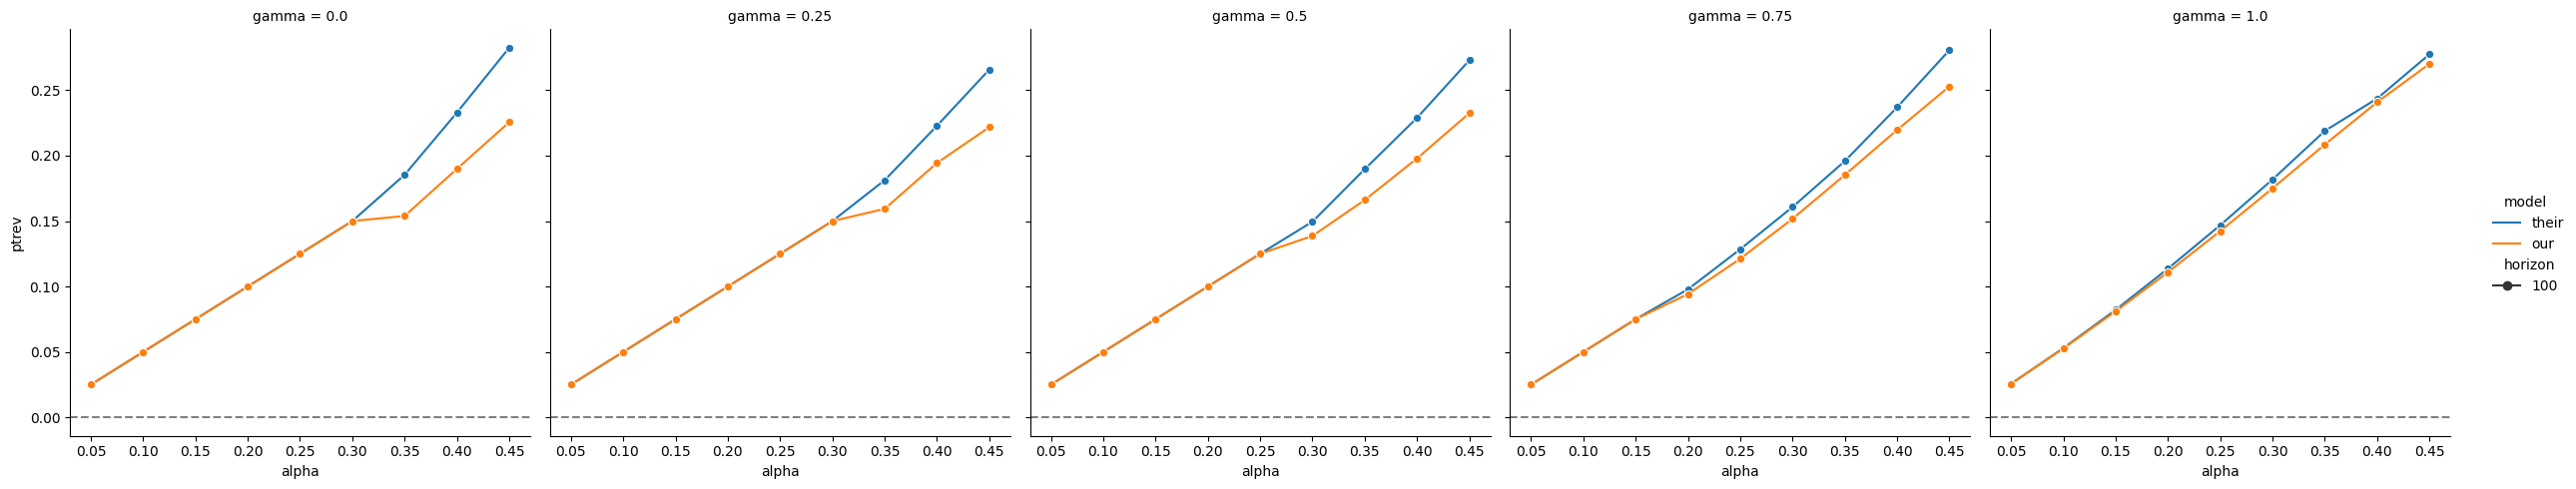

In [4]:
# Compare model w.r.t. reward
sns.relplot(
    data.query("horizon==horizon.max() and eps==eps.min()"),
    x="alpha",
    y="ptrev",
    col="gamma",
    style="horizon",
    hue="model",
    kind="line",
    markers=True,
).refline(y=0)

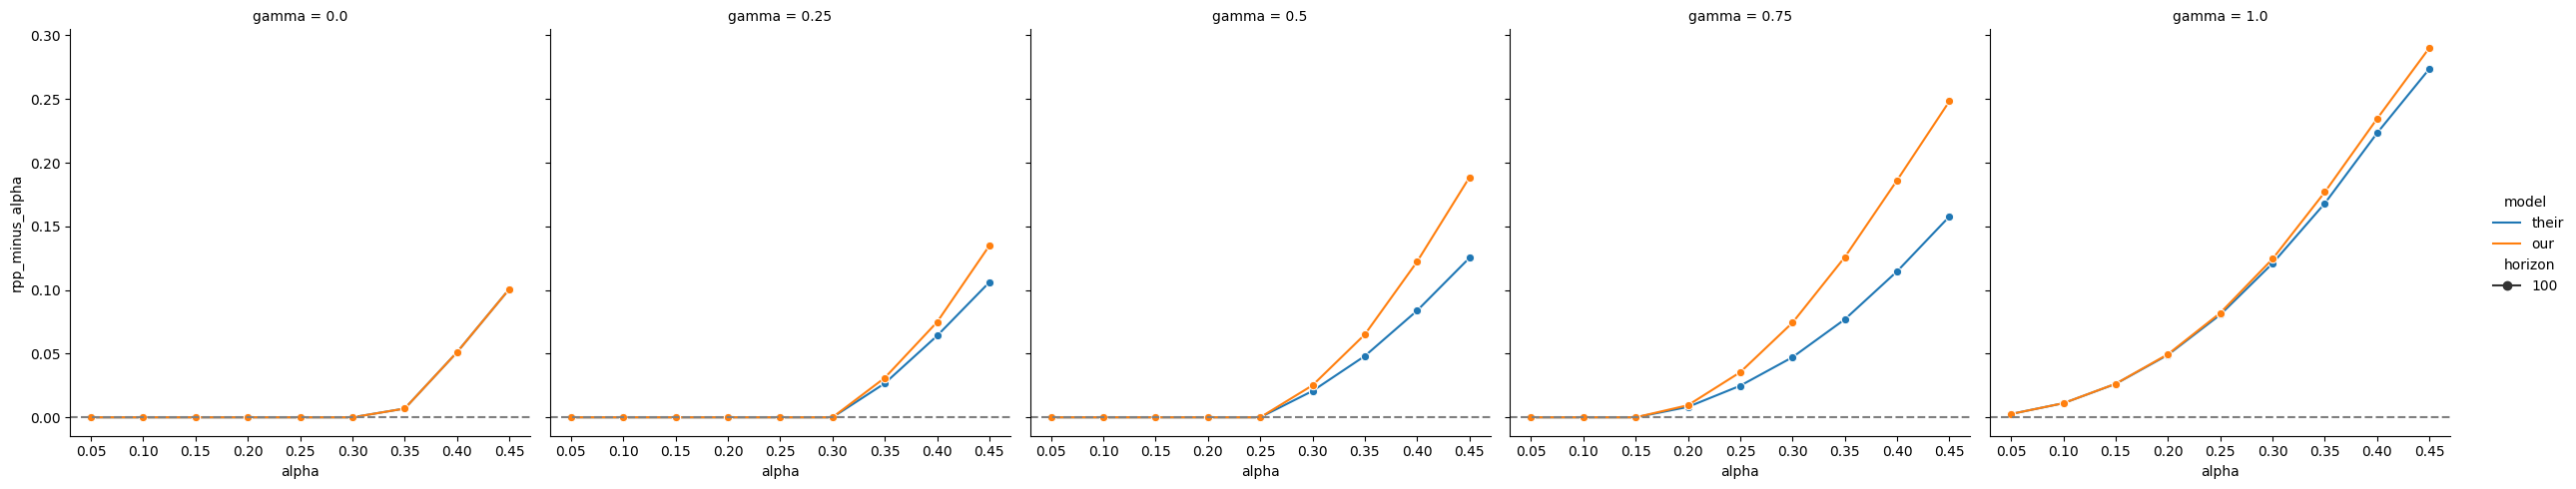

In [5]:
# Compare model w.r.t. reward
sns.relplot(
    data.query("horizon==horizon.max() and eps==eps.min()"),
    x="alpha",
    y="rpp_minus_alpha",
    col="gamma",
    style="horizon",
    hue="model",
    kind="line",
    markers=True,
).refline(y=0)

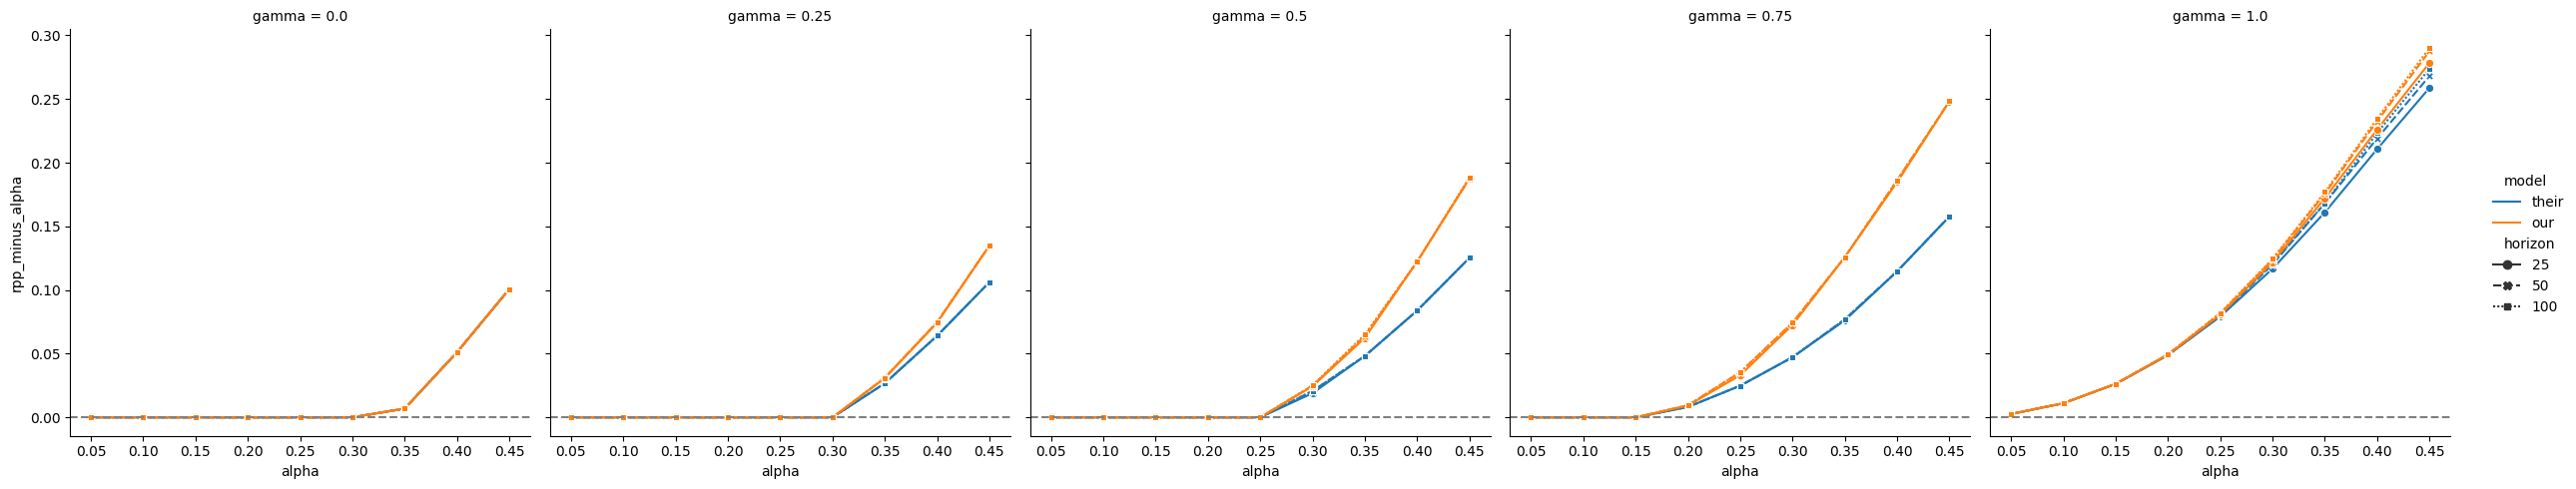

In [6]:
# Demonstrate effect of horizon
sns.relplot(
    data.query("eps==eps.min()"),
    x="alpha",
    y="rpp_minus_alpha",
    col="gamma",
    hue="model",
    style="horizon",
    kind="line",
    markers=True,
).refline(y=0)

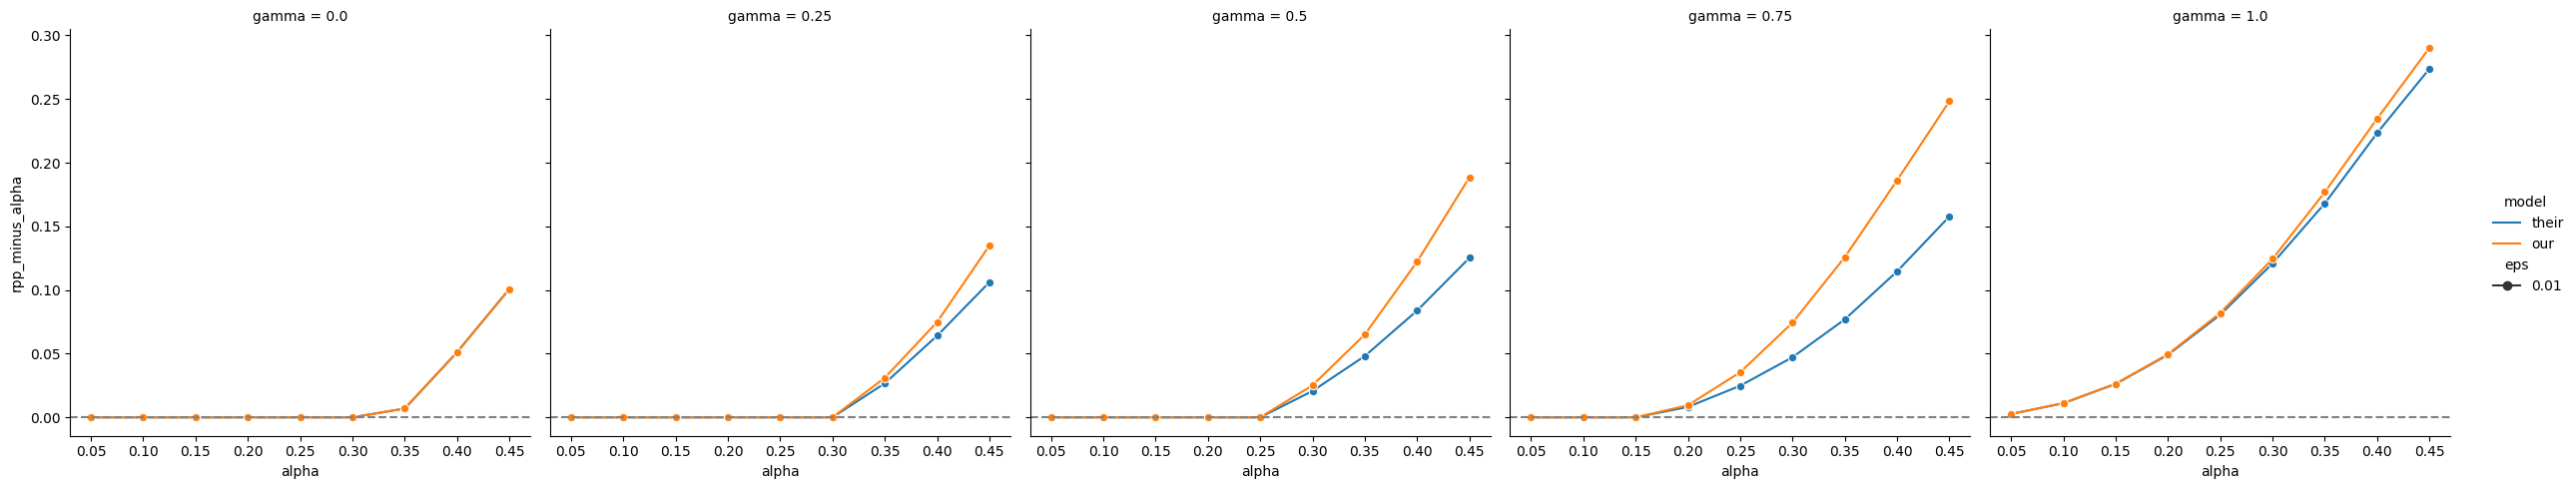

In [7]:
# Demonstrate effect of eps
sns.relplot(
    data.query("horizon==horizon.max()"),
    x="alpha",
    y="rpp_minus_alpha",
    col="gamma",
    hue="model",
    style="eps",
    kind="line",
    markers=True,
).refline(y=0)

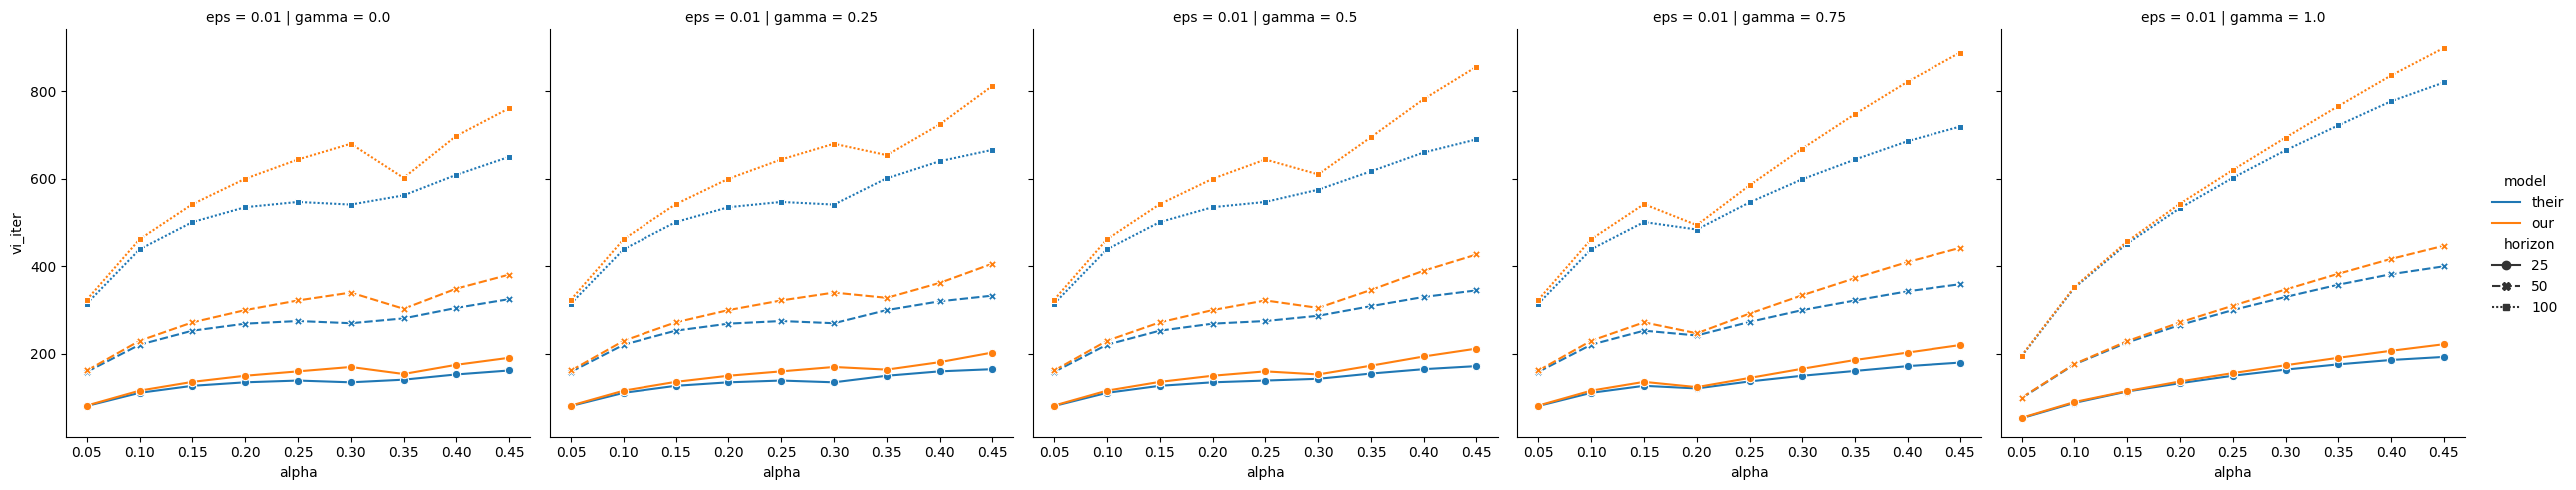

In [8]:
# Visualize number iterations required in value iteration
# It's intersting that the models behave so similar!
sns.relplot(
    data,
    x="alpha",
    y="vi_iter",
    col="gamma",
    hue="model",
    row="eps",
    style="horizon",
    kind="line",
    markers=True,
)

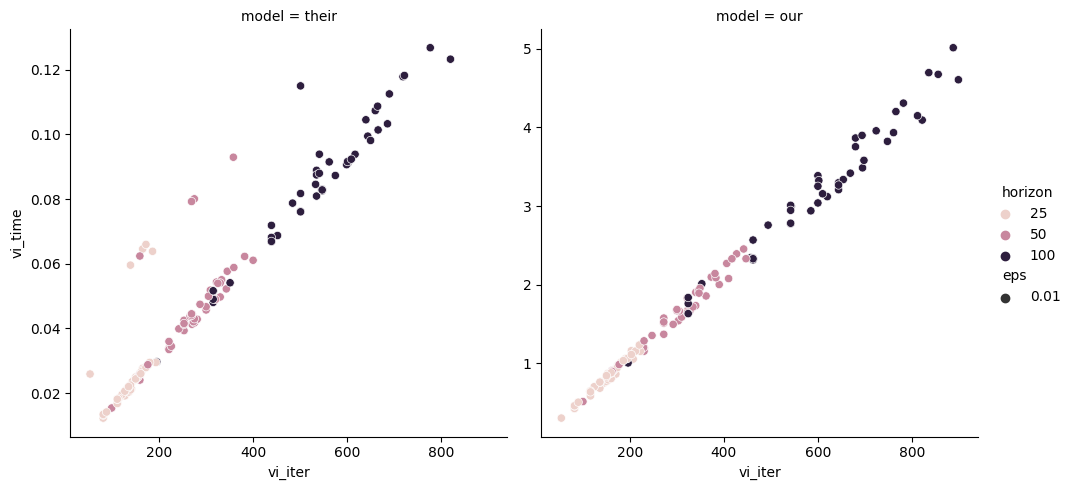

In [9]:
# Visualize solving time
# Naturally, the smaller model can be iterated much faster
sns.relplot(
    data,
    x="vi_iter",
    y="vi_time",
    hue="horizon",
    style="eps",
    col="model",
    facet_kws=dict(sharey=False),
)

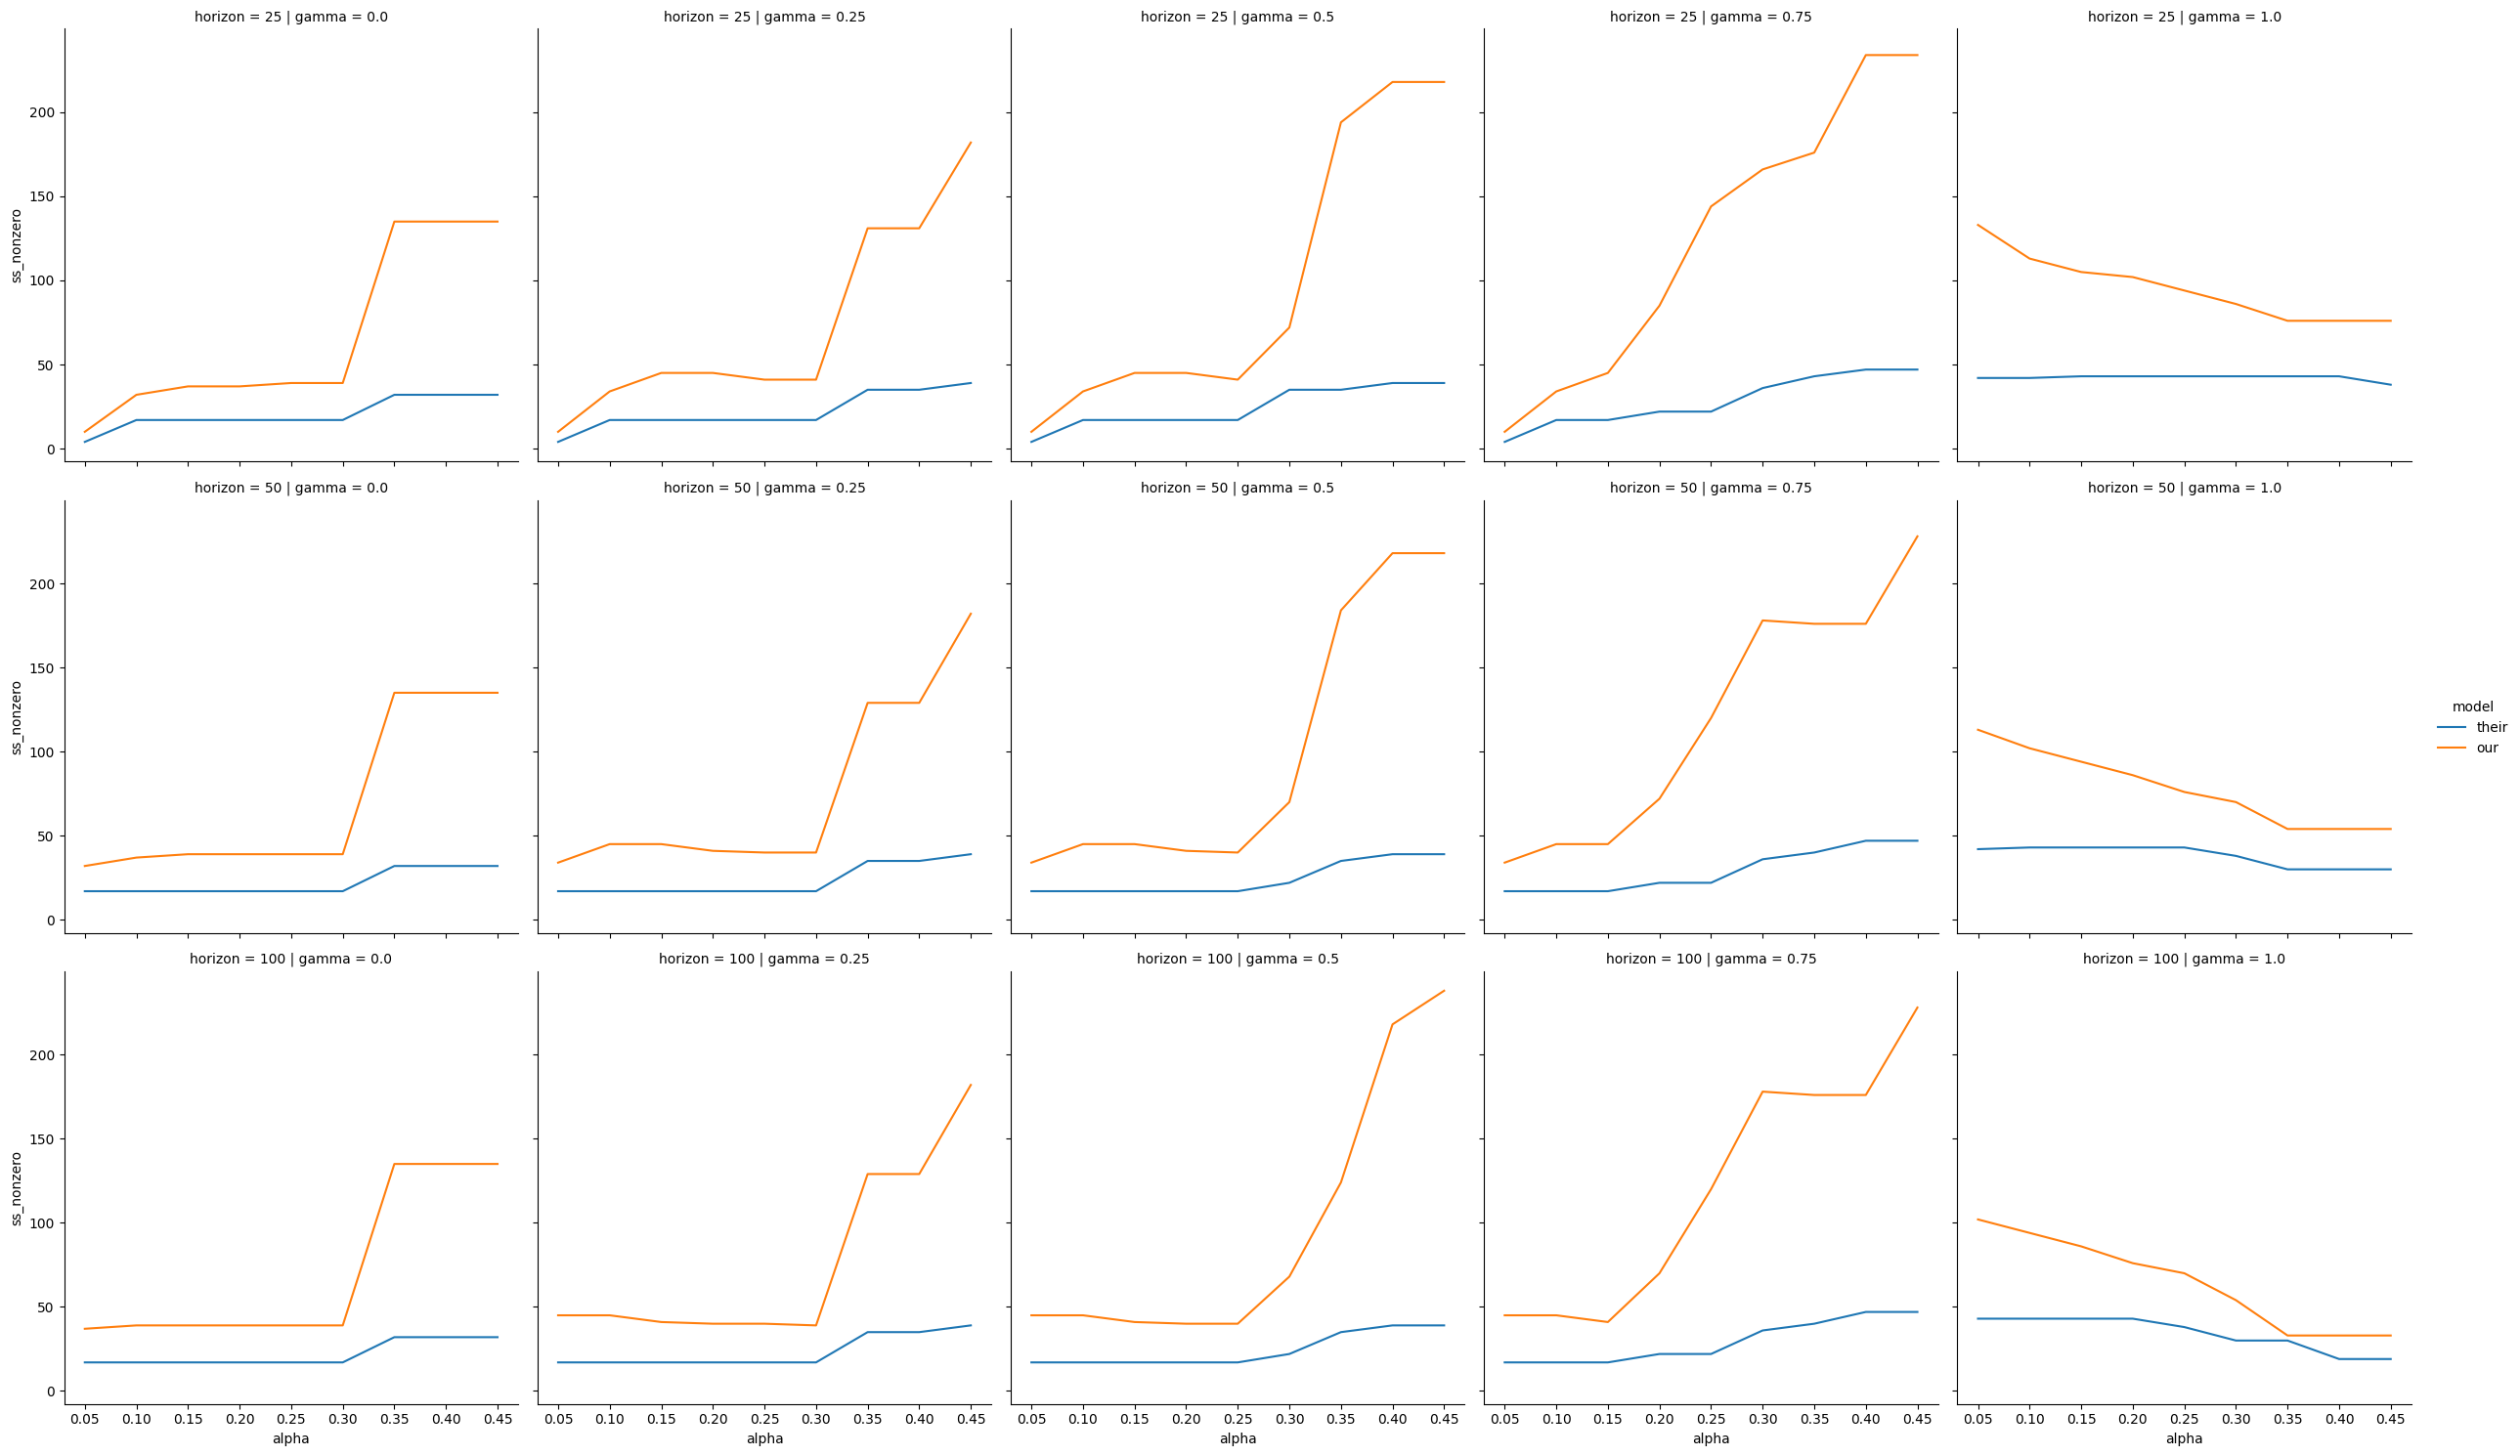

In [10]:
# Size of policy / steady state
sns.relplot(
    data,
    x="alpha",
    y="ss_nonzero",
    col="gamma",
    row="horizon",
    hue="model",
    kind="line",
    markers=True,
)

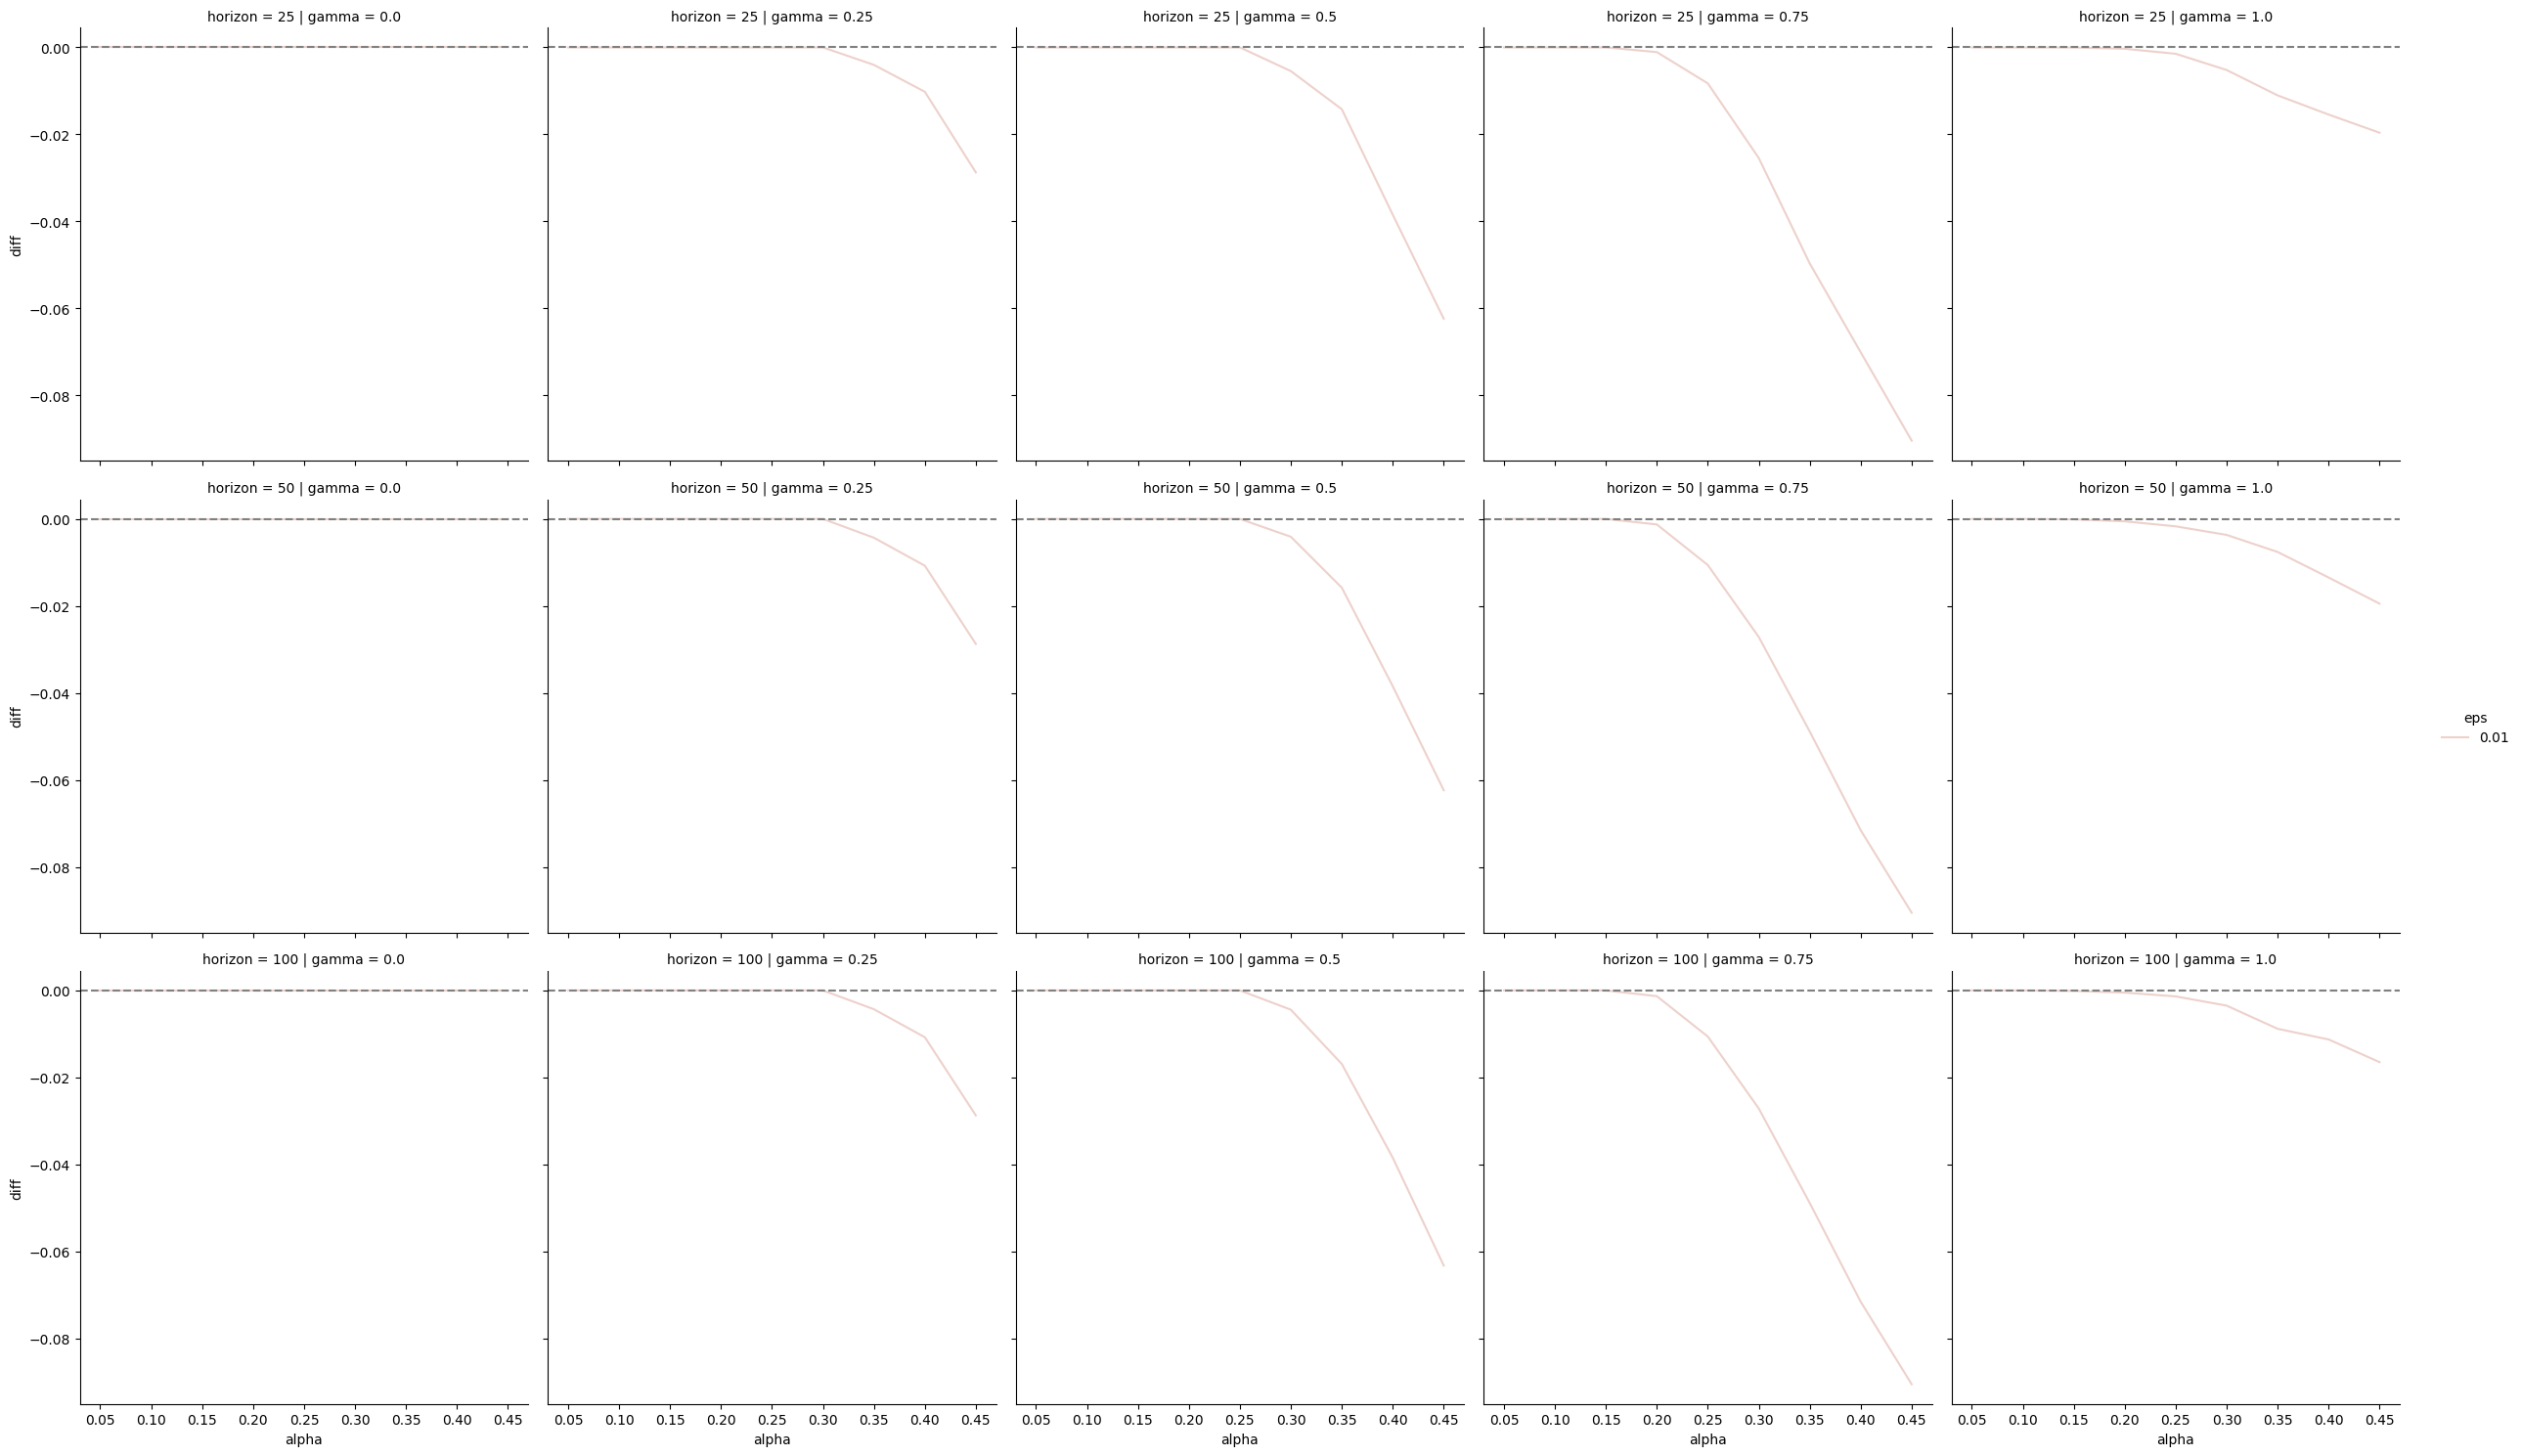

In [11]:
# We're now interested in the difference between the models
# Can we bring the difference down by selecting better hyper params?
diff = data.pivot(
    index=["alpha", "gamma", "horizon", "eps"], columns="model", values=["rpp"]
)
diff.columns = [j for i, j in diff.columns]
diff["diff"] = diff.their - diff.our
diff = diff.reset_index()
sns.relplot(
    kind="line",
    data=diff,
    x="alpha",
    y="diff",
    row="horizon",
    col="gamma",
    hue="eps",
).refline(y=0)